<a href="https://colab.research.google.com/github/BenGravell/rbot101/blob/main/probability_theory/multivariate_gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Only need to run this once per Colab notebook
!git clone https://github.com/BenGravell/rbot101

fatal: destination path 'rbot101' already exists and is not an empty directory.


In [2]:
import sys
sys.path.insert(0,'/content/rbot101')
sys.path.insert(0,'/content/rbot101/probability_theory')

In [3]:
import numpy as np
import numpy.linalg as la
import numpy.random as npr
import matplotlib.pyplot as plt
from utility import savefig, plt_reset

In [4]:
def rand_psd(d):
    # Generate a random d x d positive semidefinite matrix
    E = np.diag(npr.rand(d))
    U = npr.randn(d, d)
    V = la.qr(U)[0]
    P = V.dot(E.dot(V.T))
    return P

In [5]:
def multivariate_gaussian_pdf(x, mean, covr):
    n = mean.size
    a = (((2*np.pi)**n)*la.det(covr))**0.5
    z = x - mean
    b = np.dot(z, la.solve(covr, z))
    return np.exp(-0.5*b)/a

In [6]:
plt_reset()
npr.seed(12)
n = 2
num_dists = 4

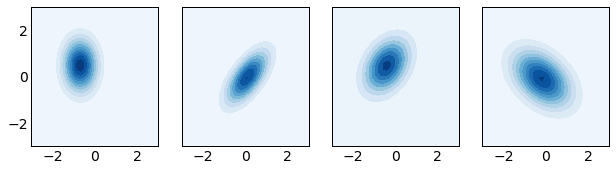

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=num_dists, figsize=(2.2*num_dists, 2.6), sharex=True, sharey=True)
for k in range(num_dists):
    mean = 2*npr.rand(n)-1
    covr = rand_psd(n)
    nx, ny = 50, 50
    x, y = np.linspace(-3, 3, nx), np.linspace(-3, 3, ny)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(nx):
        for j in range(ny):
            Z[i, j] = multivariate_gaussian_pdf(np.array([X[i, j], Y[i, j]]), mean, covr)
    ax[k].contourf(X, Y, Z, levels=10, cmap='Blues')
fig.tight_layout()
savefig('multivariate_gaussian.pdf')